# <font color="#ff0681"> ***Projet Aurélie JAMMES & Hiatini TEKOHUOTETUA***</font>

-----------
# <font color="#9600ff"> **INTRODUCTION**
-----------


1) set the environment

In [ ]:
# for installing java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# for downloading hadoop for spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
# unzipping hadoop for spark
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
# setting environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
# installing spark on the current environment
!pip install -q findspark
import findspark
findspark.init()
# mount your google drive to be able to access files from your google drive !
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import pyspark and create a SparkSession from pyspark.sql for working with DataFrame. We choosed pyspark.sql because we are going to work with a structrured database.

In [ ]:
import pyspark
spark = pyspark.sql.SparkSession.builder.appName("Spark-Project-Part2").getOrCreate()

2) import the database as a dataframe

In [ ]:
real_estate_df = spark.read.csv('drive/MyDrive/PROJECT_DATA/project_data_real_estate_toulouse_and_suburbs.csv',header=True,sep=';')
real_estate_df.show(5)
real_estate_df.printSchema()

+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
|  SaleDate|SaleType| Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
|15/01/2019|    SALE| 95000|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|21/01/2019|    SALE|261700|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|03/01/2019|    SALE|101000|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|11/01/2019|    SALE| 59500|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
|15/01/2019|    SALE|179000|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        95|     263|
+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
only showing top 5 rows

root
 |-- Sa

3)	Creating the temporary view from the DataFrame

In [ ]:
real_estate_df.createOrReplaceTempView('real_estate')

------------------------------
# <font color="#9600ff"> **I. EVOLUTION OF PRICES**
------------------------------

**1) We create a new column with the Price per square meter**

In [ ]:
#price per square meter
real_estate_price_per_square_meter_df = spark.sql(" SELECT*, price/LivingArea as PricePerSquareMeter FROM real_estate ")

#create the temporary view from the DataFrame
real_estate_price_per_square_meter_df.createOrReplaceTempView('price_per_square_meter')

**2) We want to split the SaleDate into Years Months and Days in order to analyze the evolution of price per year.**

In [ ]:
# importing all from pyspark.sql.function
from pyspark.sql.functions import *

# split() function defining parameters
split_cols = pyspark.sql.functions.split(real_estate_price_per_square_meter_df['SaleDate'], '/')
  
# Now applying split() using withColumn()
real_estate_split_date_df = real_estate_price_per_square_meter_df.withColumn('Year', split_cols.getItem(2)) \
    .withColumn('Month', split_cols.getItem(1)) \
    .withColumn('Day', split_cols.getItem(0))

#create the temporary view from the DataFrame
real_estate_split_date_df.createOrReplaceTempView('real_estate_split_date')

  

ModuleNotFoundError: ignored

**3) We create 5 dataframes whith the average price per square meter grouping by City, one for each year.**

In [ ]:
# avg_PricePerSquareMeter_in_2015
avgPricePerSquareMeter_perCity_2015_df = spark.sql("SELECT City, CAST(avg(PricePerSquareMeter) as INT) as avg_PricePerSquareMeter_in_2015 \
                              FROM real_estate_split_date \
                              WHERE Year=2015 \
                              GROUP BY City \
                              ORDER BY avg(PricePerSquareMeter) desc ")
avgPricePerSquareMeter_perCity_2015_df.show()

# avg_PricePerSquareMeter_in_2016
avgPricePerSquareMeter_perCity_2016_df = spark.sql("SELECT City, CAST(avg(PricePerSquareMeter) as INT) as avg_PricePerSquareMeter_in_2016 \
                              FROM real_estate_split_date \
                              WHERE Year=2016 \
                              GROUP BY City \
                              ORDER BY avg(PricePerSquareMeter) desc ")
avgPricePerSquareMeter_perCity_2016_df.show()

# avg_PricePerSquareMeter_in_2017
avgPricePerSquareMeter_perCity_2017_df = spark.sql("SELECT City, CAST(avg(PricePerSquareMeter) as INT) as avg_PricePerSquareMeter_in_2017 \
                              FROM real_estate_split_date \
                              WHERE Year=2017 \
                              GROUP BY City \
                              ORDER BY avg(PricePerSquareMeter) desc ")
avgPricePerSquareMeter_perCity_2017_df.show()

# avg_PricePerSquareMeter_in_2018
avgPricePerSquareMeter_perCity_2018_df = spark.sql("SELECT City, CAST(avg(PricePerSquareMeter) as INT) as avg_PricePerSquareMeter_in_2018 \
                              FROM real_estate_split_date \
                              WHERE Year=2018 \
                              GROUP BY City \
                              ORDER BY avg(PricePerSquareMeter) desc ")
avgPricePerSquareMeter_perCity_2018_df.show()

# avg_PricePerSquareMeter_in_2019
avgPricePerSquareMeter_perCity_2019_df = spark.sql("SELECT City, CAST(avg(PricePerSquareMeter) as INT) as avg_PricePerSquareMeter_in_2019 \
                              FROM real_estate_split_date \
                              WHERE Year=2019 \
                              GROUP BY City \
                              ORDER BY avg(PricePerSquareMeter) desc ")
avgPricePerSquareMeter_perCity_2019_df.show()

+--------------------+-------------------------------+
|                City|avg_PricePerSquareMeter_in_2015|
+--------------------+-------------------------------+
|          SAINT-JEAN|                          44756|
|              PIBRAC|                          31822|
|          AUCAMVILLE|                          25193|
|            TOULOUSE|                          19408|
|RAMONVILLE-SAINT-...|                          13547|
|               MURET|                          10501|
| VILLENEUVE TOLOSANE|                          10182|
|  PLAISANCE DU TOUCH|                           7431|
|             BLAGNAC|                           5563|
|  AUZEVILLE-TOLOSANE|                           4408|
|    VIEILLE TOULOUSE|                           3997|
|       TOURNEFEUILLE|                           3331|
|    CASTANET TOLOSAN|                           3289|
|           BEAUZELLE|                           3225|
|               BALMA|                           3102|
|         

**4) We join the five dataframes in as one in order to have all the values in the same dataframe**

In [ ]:
#create the temporary views from the DataFrames
avgPricePerSquareMeter_perCity_2015_df.createOrReplaceTempView('avgPricePerSquareMeter_perCity_2015')
avgPricePerSquareMeter_perCity_2016_df.createOrReplaceTempView('avgPricePerSquareMeter_perCity_2016')
avgPricePerSquareMeter_perCity_2017_df.createOrReplaceTempView('avgPricePerSquareMeter_perCity_2017')
avgPricePerSquareMeter_perCity_2018_df.createOrReplaceTempView('avgPricePerSquareMeter_perCity_2018')
avgPricePerSquareMeter_perCity_2019_df.createOrReplaceTempView('avgPricePerSquareMeter_perCity_2019')

# join 
avgPricePerSquareMeter_perCity_join_df = spark.sql(" SELECT *\
                                                    FROM avgPricePerSquareMeter_perCity_2015 \
                                                    JOIN avgPricePerSquareMeter_perCity_2016 \
                                                    ON avgPricePerSquareMeter_perCity_2015.City = avgPricePerSquareMeter_perCity_2016.City \
                                                    JOIN avgPricePerSquareMeter_perCity_2017 \
                                                    ON avgPricePerSquareMeter_perCity_2017.City = avgPricePerSquareMeter_perCity_2016.City \
                                                    JOIN avgPricePerSquareMeter_perCity_2018 \
                                                    ON avgPricePerSquareMeter_perCity_2018.City = avgPricePerSquareMeter_perCity_2016.City \
                                                    JOIN avgPricePerSquareMeter_perCity_2019 \
                                                    ON avgPricePerSquareMeter_perCity_2019.City = avgPricePerSquareMeter_perCity_2016.City")
avgPricePerSquareMeter_perCity_join_df.show()

+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+
|                City|avg_PricePerSquareMeter_in_2015|                City|avg_PricePerSquareMeter_in_2016|                City|avg_PricePerSquareMeter_in_2017|                City|avg_PricePerSquareMeter_in_2018|                City|avg_PricePerSquareMeter_in_2019|
+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+--------------------+-------------------------------+
|             BLAGNAC|                           5563|             BLAGNAC|                          18694|             BLAGNAC|                           4652|             BLAGNAC|                  

**5) Convert the sql dataframe into a panda dataframe** 

**Clean the data**

**Display the final dataframe**

In [ ]:
#Import pyspark.pandas  
import pandas as pd

#Convert the dataframe to a panda DataFrame
pandas_df = avgPricePerSquareMeter_perCity_join_df.toPandas()

#Rename columns
pandas_df.set_axis(['City', 'avg_PricePerSquareMeter_in_2015', 'a','avg_PricePerSquareMeter_in_2016','b','avg_PricePerSquareMeter_in_2017', 'c', 'avg_PricePerSquareMeter_in_2018', 'd', 'avg_PricePerSquareMeter_in_2019'], axis='columns', inplace=True)

#delete the column a,b,c and d dataframe 
real_estate_vf_df = pandas_df[['City', 'avg_PricePerSquareMeter_in_2015', 'avg_PricePerSquareMeter_in_2016', 'avg_PricePerSquareMeter_in_2017', 'avg_PricePerSquareMeter_in_2018', 'avg_PricePerSquareMeter_in_2019']]

#create a new column : percentage_increase
real_estate_vf_df = real_estate_vf_df.assign( percentage_of_increase_in_5_years = ((real_estate_vf_df['avg_PricePerSquareMeter_in_2019'] - real_estate_vf_df['avg_PricePerSquareMeter_in_2015']) / real_estate_vf_df['avg_PricePerSquareMeter_in_2015']) * 100)

#sort and display the dataframe 
real_estate_vf_df.sort_values(by = 'percentage_of_increase_in_5_years', ascending = False) 


,City,avg_PricePerSquareMeter_in_2015,avg_PricePerSquareMeter_in_2016,avg_PricePerSquareMeter_in_2017,avg_PricePerSquareMeter_in_2018,avg_PricePerSquareMeter_in_2019,percentage_of_increase_in_5_years
16,CASTANET TOLOSAN,3289,3316,3854,4496,5421,64.822134
24,TOULOUSE,19408,8502,11858,5588,25310,30.410140
6,BEAUZELLE,3225,3086,3330,3299,3988,23.658915
21,SAINT-ORENS-DE-GAMEVILLE,2964,3137,5535,3328,3502,18.151147
19,QUINT-FONSEGRIVES,2871,3733,3421,3251,3371,17.415535
2,LEGUEVIN,2537,2467,2351,2452,2759,8.750493
9,CORNEBARRIEU,2442,7795,2913,3364,2552,4.504505
20,COLOMIERS,2611,14674,2904,3421,2702,3.485255
12,BALMA,3102,3944,3759,3434,3183,2.611219
15,CUGNAUX,2558,6856,18759,2929,2599,1.602815


------------
#<font color='#00b8ff'> **RESULTS**
------------
Thanks to the DataFrame above we can see that the top 3 cities in term of increase in the price per square meter are CASTANET TOLOSAN with 65% increase in 5 years, TOULOUSE with 30% and BEAUZELLE with 24%.

On the contrary, SAINT-JEAN had a decrease of 94% in five years which is quite surprising. It could be interesting to do a more in-depth analysis of its sales. 

Only 11 cities out of 26 have seen an increase in their price per square meter over these five years.

=> it could be interesting for Immo-iv to focus its future investments on the top 3 cities : CASTANET TOLOSAN, TOULOUSE and BEAUZELLE.

------------

------------------------------
# <font color="#9600ff"> **II. EVOLUTION OF THE NUMBER OF SALES**
------------------------------

**We want to analyze the global evolution of the number of sales between 2015 and 2019.**

**1) We want to split the SaleDate into Years Months and Days in order to analyze the evolution of price per year.**

In [ ]:
# importing all from pyspark.sql.function
from pyspark.sql.functions import *

# split() function defining parameters
split_cols = pyspark.sql.functions.split(real_estate_df['SaleDate'], '/')
  
# Now applying split() using withColumn()
real_estate_split_date_df = real_estate_df.withColumn('Year', split_cols.getItem(2)) \
    .withColumn('Month', split_cols.getItem(1)) \
    .withColumn('Day', split_cols.getItem(0))

#create the temporary view from the DataFrame
real_estate_split_date_df.createOrReplaceTempView('real_estate_split_date')

**2) We count the number of sales per year**

In [ ]:
residences_sold_by_year_df = spark.sql (" SELECT \
    (SELECT COUNT(*) FROM real_estate_split_date WHERE Year='2015') as 2015_sales, \
    (SELECT COUNT(*) FROM real_estate_split_date WHERE Year='2016') as 2016_sales, \
    (SELECT COUNT(*) FROM real_estate_split_date WHERE Year='2017') as 2017_sales, \
    (SELECT COUNT(*) FROM real_estate_split_date WHERE Year='2018') as 2018_sales, \
    (SELECT COUNT(*) FROM real_estate_split_date WHERE Year='2019') as 2019_sales ")
residences_sold_by_year_df.show()

+----------+----------+----------+----------+----------+
|2015_sales|2016_sales|2017_sales|2018_sales|2019_sales|
+----------+----------+----------+----------+----------+
|     18476|     18444|     20852|     16637|      5709|
+----------+----------+----------+----------+----------+



**3) Data Visualization**

   year  number_of_sales
0  2015            18476
1  2016            18444
2  2017            20852
3  2018            16637
4  2019             5709


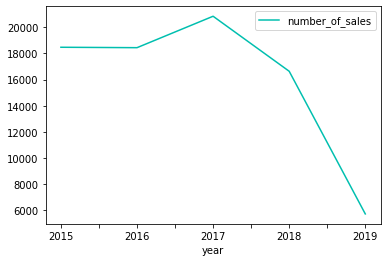

In [ ]:
# Import pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# A dictionary which represents data
residences_sold_by_year_dict = { 'year':['2015','2016','2017','2018','2019'],
              'number_of_sales':[18476,18444,20852,16637,5709],
              }
  
# creating a data frame object
residences_sold_by_year_pandas_df = pd.DataFrame(residences_sold_by_year_dict)
print(residences_sold_by_year_pandas_df)

# we plot our results
residences_sold_by_year_pandas_df.plot(x = 'year', y='number_of_sales', kind='line', color='#00bfaf')	
plt.show()

------------
# <font color='#00b8ff'> **RESULTS**
------------
Thanks to the plot above we can see that the number of sales in toulouse and its suburbs droppped between 2017 and 2019.

=> It could be interesting for Immo-Inv to analyze the political context of 2017 in order to understant why the number of sales dropped, to know if it is still interesting. 

------------

------------------------------
# <font color="#9600ff"> **III. ANALYSIS OF SALES BEFORE COMPLETION**
------------------------------

**1) We create a new dataframe with only the sales before completion**

In [ ]:
sales_before_completion_df = spark.sql("SELECT * FROM real_estate WHERE SaleType='SALE BEFORE COMPLETION' ")

#create the temporary view from the DataFrame
sales_before_completion_df.createOrReplaceTempView('sales_before_completion')


**2) We want to count the total number of apartment and house sold before completion**

+-----------+
|house_count|
+-----------+
|        721|
+-----------+

+---------------+
|apartment_count|
+---------------+
|          12709|
+---------------+



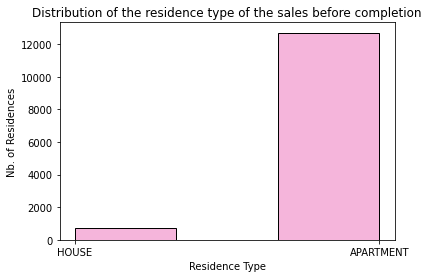

In [ ]:
distinct_house_count_df = spark.sql(" SELECT COUNT(ResidenceType) as house_count \
                                      FROM sales_before_completion WHERE ResidenceType='HOUSE' ")
distinct_house_count_df.show()

distinct_apartment_count_df = spark.sql(" SELECT COUNT(ResidenceType) as apartment_count \
                                          FROM sales_before_completion WHERE ResidenceType='APARTMENT' ")
distinct_apartment_count_df.show()

# Import pyspark.pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# Convert the dataframe to a panda DataFrame
sales_before_completion_pandas_df = sales_before_completion_df.toPandas()
# we plot our results
plt.hist(sales_before_completion_pandas_df['ResidenceType'], color='#f5b5db', edgecolor='black', bins=3)
plt.xlabel('Residence Type')
plt.ylabel('Nb. of Residences')
plt.title('Distribution of the residence type of the sales before completion')
plt.show()

***We can see that most of the sales realised before completion are apartments.***

***This is why we will focus our analysis only on apartment.***

**3) We create a new dataframe with only apartments sold before completion**

In [ ]:
sales_before_completion_apartment_df = spark.sql("SELECT * FROM sales_before_completion WHERE ResidenceType='APARTMENT' ")

#create the temporary view from the DataFrame
sales_before_completion_apartment_df.createOrReplaceTempView('sales_before_completion_apartment')


**4) We want to count the total number of rooms in apartments sold before completion**

In [ ]:
average_NbRooms_df = spark.sql("SELECT City, avg(NbRooms) as average_NbRooms \
                             FROM sales_before_completion_apartment \
                             GROUP BY City ")
average_NbRooms_df.show()

+--------------------+------------------+
|                City|   average_NbRooms|
+--------------------+------------------+
|             BLAGNAC|2.6294642857142856|
|          FENOUILLET|2.7714285714285714|
|            LEGUEVIN|2.4444444444444446|
|  PORTET SUR GARONNE| 2.617021276595745|
| VILLENEUVE TOLOSANE|2.8217821782178216|
|       TOURNEFEUILLE| 2.547752808988764|
|           BEAUZELLE|2.6715328467153285|
|              PIBRAC| 2.364864864864865|
|RAMONVILLE-SAINT-...|3.1578947368421053|
|        CORNEBARRIEU|2.4895104895104896|
|  PLAISANCE DU TOUCH|               2.4|
|               MURET|               3.0|
|               BALMA|3.0777027027027026|
|          ESCALQUENS|          2.484375|
|             CUGNAUX| 2.671597633136095|
|    CASTANET TOLOSAN|2.4951923076923075|
|             L UNION|           2.53125|
|          SAINT-JEAN| 2.676348547717842|
|   QUINT-FONSEGRIVES| 2.672268907563025|
|           COLOMIERS| 2.494661921708185|
+--------------------+------------

**This dataframe emphasizes that the average number of rooms is fairly similar in all Cities. Most of the residences sold before completion are apartments with 2 or 3 rooms.**

**5) We want to analyze if the number of sales before completion has increased or decreased significantly during 2015 and 2019.**

In [ ]:
# WE SPLIT THE SALEDATE
# importing all from pyspark.sql.function
from pyspark.sql.functions import *

# split() function defining parameters
split_cols = pyspark.sql.functions.split(sales_before_completion_apartment_df['SaleDate'], '/')
  
# Now applying split() using withColumn()
sales_before_completion_apartment_year_df = sales_before_completion_apartment_df.withColumn('Year', split_cols.getItem(2)) \
    .withColumn('Month', split_cols.getItem(1)) \
    .withColumn('Day', split_cols.getItem(0))

#create the temporary view from the DataFrame
sales_before_completion_apartment_year_df.createOrReplaceTempView('sales_before_completion_apartment_year')


In [ ]:
#NUMBER OF SALES BEFORE COMPLETION PER YEAR
Number_of_sales_before_completion_df = spark.sql("SELECT Year, COUNT(Year) as Number_of_sales_before_completion \
                                                  FROM sales_before_completion_apartment_year \
                                                  GROUP BY Year \
                                                  ORDER BY Year asc ")

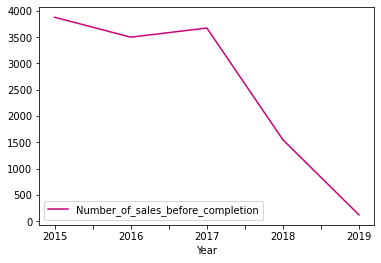

In [ ]:
#WE PLOT THE NUMBER OF SALES BEFORE COMPLETION PER YEAR
# Import pyspark.pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# Convert the dataframe to a panda DataFrame
Number_of_sales_before_completion_df = Number_of_sales_before_completion_df.toPandas()

# we plot our results
Number_of_sales_before_completion_df.plot(x='Year', y='Number_of_sales_before_completion', kind='line', color='#c90076')	
plt.show()

In [ ]:
#total_amount_spent per year
price_per_year_df = spark.sql("SELECT Year, CAST(sum(Price) AS INT) as total_amount_spent \
                             FROM sales_before_completion_apartment_year \
                             GROUP BY Year \
                             ORDER BY Year asc ")

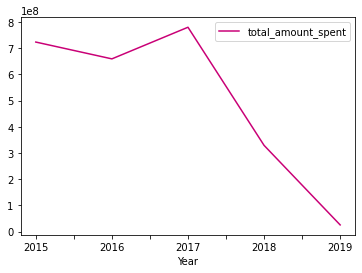

In [ ]:
# Import pyspark.pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# Convert the dataframe to a panda DataFrame
price_per_year_pandas_df = price_per_year_df.toPandas()

# we plot our results
price_per_year_pandas_df.plot(x='Year', y='total_amount_spent', kind='line', color='#c90076')	
plt.show()

***We can see that between 2017 and 2019, the number of sales before completion dropped. So does the total amount spent in residences sales before completion.***

------------
# <font color='#00b8ff'>**RESULTS**
------------
We can summarise our analysis with the following highlights:
- Most of the residences sold before completion are apartments with 2 or 3 rooms, the average number of rooms is fairly similar in all Cities. 
- Between 2017 and 2019, the number of sales before completion dropped. So does the total amount spent in residences sales before completion. 

=> this drop is to be analyze in a context of a general drop of the number of sales between 2017 and 2019 (cf. II).

------------

------------------------------
# <font color="#9600ff"> **IV. ANALYSIS OF TOULOUSE MARKET**
------------------------------

We want to draw the profile type of a sale realised in Toulouse during 2015 and 2019.

**1) We start by creating a new dataframe with only Toulouse sales**

In [ ]:
toulouse_df = spark.sql ("SELECT* FROM real_estate \
                          WHERE City = 'TOULOUSE'")

toulouse_df.createOrReplaceTempView('toulouse')

**2) We begin by analyzing the  type of Residence of theses sales**

+----------------+
|Nb_of_house_sold|
+----------------+
|            6191|
+----------------+

+--------------------+
|Nb_of_apartment_sold|
+--------------------+
|               45606|
+--------------------+



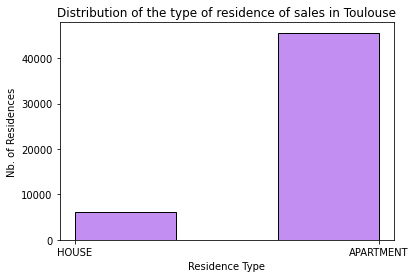

In [ ]:
toulouse_Nb_of_house_sold_df = spark.sql (" SELECT COUNT(ResidenceType) as Nb_of_house_sold \
                                     FROM toulouse \
                                     WHERE ResidenceType = 'HOUSE'")
toulouse_Nb_of_house_sold_df.show()
toulouse_Nb_of_apartment_sold_df = spark.sql (" SELECT COUNT(ResidenceType) as Nb_of_apartment_sold \
                                     FROM toulouse \
                                     WHERE ResidenceType = 'APARTMENT'")
toulouse_Nb_of_apartment_sold_df.show() 

# Import pyspark.pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
# Convert the dataframe to a panda DataFrame
toulouse_pandas_df = toulouse_df.toPandas()
# we plot our results
plt.hist(toulouse_pandas_df['ResidenceType'], color='#c38ef2', edgecolor='black', bins=3)
plt.xlabel('Residence Type')
plt.ylabel('Nb. of Residences')
plt.title('Distribution of the type of residence of sales in Toulouse')
plt.show()

**3) We focus on apartment sales**

In [ ]:
toulouse_apartment_df = spark.sql ( " SELECT * FROM toulouse \
                                      WHERE ResidenceType='APARTMENT'")
toulouse_apartment_df.createOrReplaceTempView('toulouse_apartment')

**4) We want to know the mean price of sale, the average number of rooms of apartement sold, the average number of lots of apartement sold, their average meter of living area and the number of apartment sold by year. We are going to do this analysis by postcode.**

In [ ]:
## MEAN PRICE

mean_price_df = spark.sql (" SELECT PostCode, CAST(avg(price) AS INT) as mean_price \
                              FROM toulouse_apartment \
                              GROUP BY PostCode \
                              ORDER BY mean_price desc")

In [ ]:
## AVERAGE NUMBER OF ROOMS

average_number_of_rooms_df = spark.sql (" SELECT PostCode, avg(NbRooms) as average_number_of_rooms \
                              FROM toulouse_apartment \
                              GROUP BY PostCode \
                              ORDER BY average_number_of_rooms desc")

In [ ]:
## AVERAGE NUMBER OF LOTS

average_number_of_lots_df = spark.sql (" SELECT PostCode, avg(NbLots) as average_number_of_lots \
                              FROM toulouse_apartment \
                              GROUP BY PostCode \
                              ORDER BY average_number_of_lots desc")

In [ ]:
## AVERAGE METER OF LIVING AREA 

average_meter_of_living_area_df = spark.sql (" SELECT PostCode, CAST(avg(LivingArea) AS INT) as average_meter_of_living_area \
                              FROM toulouse_apartment \
                              GROUP BY PostCode \
                              ORDER BY average_meter_of_living_area desc")

In [ ]:
# WE GROUP ALL THE RESULT IN ONE DATAFRAME
#create the temporary views from the DataFrames
mean_price_df.createOrReplaceTempView('mean_price')
average_number_of_rooms_df.createOrReplaceTempView('average_number_of_rooms')
average_number_of_lots_df.createOrReplaceTempView('average_number_of_lots')
average_meter_of_living_area_df.createOrReplaceTempView('average_meter_of_living_area')

# join 
analysis_by_PostCode_join_df = spark.sql(" SELECT *\
                                        FROM mean_price \
                                        JOIN average_number_of_rooms \
                                        ON mean_price.PostCode = average_number_of_rooms.PostCode \
                                        JOIN average_number_of_lots \
                                        ON average_number_of_lots.PostCode = average_number_of_rooms.PostCode \
                                        JOIN average_meter_of_living_area \
                                        ON average_meter_of_living_area.PostCode = average_number_of_rooms.PostCode")

#Import pyspark.pandas  
import pandas as pd

#Convert the dataframe to a panda DataFrame
analysis_by_PostCode_join_pandas_df = analysis_by_PostCode_join_df.toPandas()

#Rename columns
analysis_by_PostCode_join_pandas_df.set_axis(['PostCode', 'mean_price', 'a','average_number_of_rooms','b','average_number_of_lots', 'c', 'average_meter_of_living_area'], axis='columns', inplace=True)

#delete the column a,b,c and d dataframe 
final_analysis_by_PostCode_df = analysis_by_PostCode_join_pandas_df[['PostCode', 'mean_price', 'average_number_of_rooms', 'average_number_of_lots', 'average_meter_of_living_area']]

#display the dataframe 
final_analysis_by_PostCode_df

,PostCode,mean_price,average_number_of_rooms,average_number_of_lots,average_meter_of_living_area
0,31400,934699,2.428754,1.228823,51
1,31000,354160,2.297268,1.297268,53
2,31500,623104,2.712010,1.339841,57
3,31200,473778,2.665601,1.112319,55
4,31300,768282,2.581226,1.252909,54
5,31100,974907,2.666597,1.098973,55


***This dataframe highlights that there is not a huge difference between the different post code in Toulouse, regarding the indicators calculated above.***
***The only one which differs between postcode is the mean price. Indeed, there is a huge difference of 620747€ between the highest mean price (974907 in the 31100) and the lowest (354160 in the 31000).***

+----------+----------+----------+----------+----------+
|2015_sales|2016_sales|2017_sales|2018_sales|2019_sales|
+----------+----------+----------+----------+----------+
|     10384|     10371|     12028|      9272|      3551|
+----------+----------+----------+----------+----------+

   year  number_of_sales
0  2015            10384
1  2016            10371
2  2017            12028
3  2018             9272
4  2019             3551


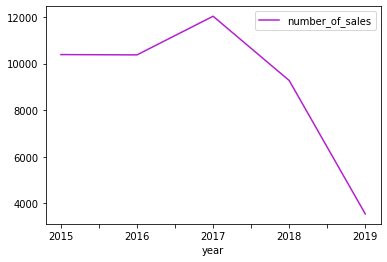

In [ ]:
## NB OF APARTMENT SOLD BY YEAR

# we split SaleDate into Year, Month and Day
# importing all from pyspark.sql.function
from pyspark.sql.functions import *

# split() function defining parameters
split_cols = pyspark.sql.functions.split(toulouse_apartment_df['SaleDate'], '/')
  
# Now applying split() using withColumn()
toulouse_apartment_split_date_df = toulouse_apartment_df.withColumn('Year', split_cols.getItem(2)) \
    .withColumn('Month', split_cols.getItem(1)) \
    .withColumn('Day', split_cols.getItem(0))

#create the temporary view from the DataFrame
toulouse_apartment_split_date_df.createOrReplaceTempView('toulouse_apartment_split_date')

# we count the number of apartment sold by year
apartment_sold_by_year_df = spark.sql (" SELECT \
    (SELECT COUNT(*) FROM toulouse_apartment_split_date WHERE Year='2015') as 2015_sales, \
    (SELECT COUNT(*) FROM toulouse_apartment_split_date WHERE Year='2016') as 2016_sales, \
    (SELECT COUNT(*) FROM toulouse_apartment_split_date WHERE Year='2017') as 2017_sales, \
    (SELECT COUNT(*) FROM toulouse_apartment_split_date WHERE Year='2018') as 2018_sales, \
    (SELECT COUNT(*) FROM toulouse_apartment_split_date WHERE Year='2019') as 2019_sales ")
apartment_sold_by_year_df.show()

# WE PLOT THE RESULTS
#---------------------
# Import matplotlib 
import matplotlib.pyplot as plt
# A dictionary which represents data
data_dict = { 'year':['2015','2016','2017','2018','2019'],
              'number_of_sales':[10384,10371,12028,9272,3551],
              }
  
# creating a data frame object
df = pd.DataFrame(data_dict)
print(df)

# we plot our results
df.plot(x = 'year', y='number_of_sales', kind='line', color='#b41fce')	
plt.show()

------------
# <font color='#00b8ff'>**RESULTS**
------------
We can summarise our analysis with the following highlights:
- there is not significant difference in sales between the different post code in Toulouse, regarding the indicators calculated above. The only one which differs between postcode is the mean price, whith a huge difference of 620747€ between the highest mean price (31100) and the lowest (31000) 
- the number of sales in Toulouse has dropped significantly since 2017.

=> this drop is to be analyze in a context of a general drop of the number of sales between 2017 and 2019 (cf. II).

------------

------------------------------
# <font color="#9600ff"> **V. EVOLUTION OF THE MEAN LIVING AREA PER YEAR**
------------------------------

**We caculate the mean living area per year**

In [ ]:
mean_living_area_per_year_df = spark.sql ("SELECT Year, CAST(avg(LivingArea) AS INT) as mean_LivingArea\
                             FROM real_estate_split_date \
                             GROUP BY Year\
                             ORDER BY Year asc")

mean_living_area_per_year_df.show()

+----+---------------+
|Year|mean_LivingArea|
+----+---------------+
|2015|             66|
|2016|             65|
|2017|             66|
|2018|             69|
|2019|             66|
+----+---------------+



**DATA VISUALIZATION**

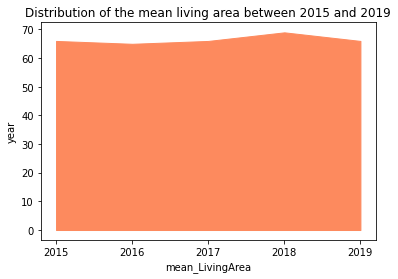

In [ ]:
# Import pyspark.pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dataframe to a panda DataFrame
mean_living_area_per_year_pandas_df = mean_living_area_per_year_df.toPandas()

# Plot
plt.fill_between(mean_living_area_per_year_pandas_df['Year'], mean_living_area_per_year_pandas_df['mean_LivingArea'], color ='#fd8a5e')
plt.xlabel('mean_LivingArea')
plt.ylabel('year')
plt.title('Distribution of the mean living area between 2015 and 2019')
plt.show()


------------
# <font color='#00b8ff'>**RESULTS**
------------
We can see that the mean living area is steady between 2015 and 2019.

------------